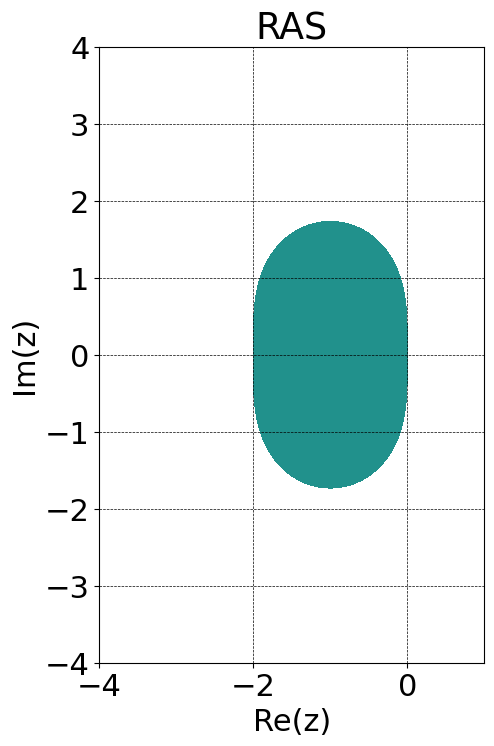

In [1]:
import numpy as np
import matplotlib.pyplot as plt

nx = 100
ny = 160
x = np.linspace(-4,1,nx)
y = np.linspace(-4,4,ny)
xg,yg = np.meshgrid(x,y)  # create the grid

z = xg + 1j*yg 
f = 1 + z + 0.5*z*z
absf = (f.real)**2 + (f.imag)**2

plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(8,8))
plt.contourf(xg,yg,absf,np.arange(2))  
plt.title("RAS")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
ax.set_aspect(1)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.savefig('RK2_RAS.pdf')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

nx = 100
ny = 160
x = np.linspace(-4,1,nx)
y = np.linspace(-4,4,ny)
xg,yg = np.meshgrid(x,y)  # create the grid

z = xg + 1j*yg 
f = 1 + z + 0.5*z*z
absf = (f.real)**2 + (f.imag)**2

plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(8,8))
plt.contourf(xg,yg,absf,np.arange(2))  
plt.title("RAS")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
ax.set_aspect(1)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.savefig('RK2_RAS.pdf')

/var/folders/t6/wgzwy45n7vv6vncq9h0vsjkm0000gp/T/ipykernel_87004/315268899.py:7: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for item in bdrydata.collections:


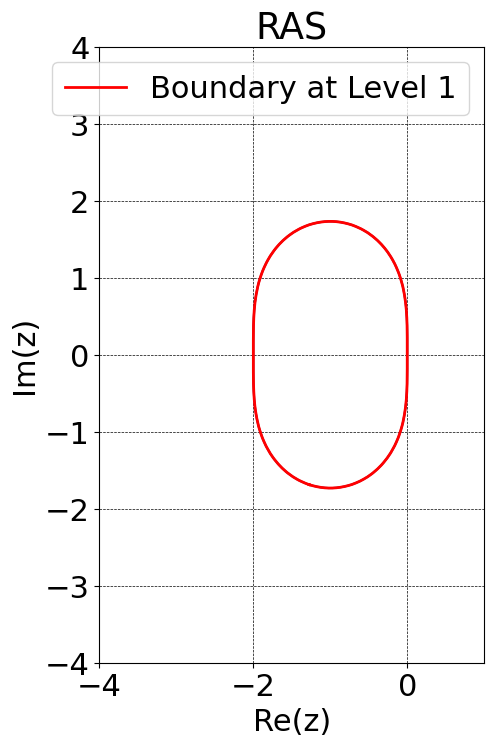

In [3]:

import numpy as np
import matplotlib.pyplot as plt

def extract_RAS_boundary(xg, yg, func):
    bdrydata = plt.contour(xg, yg, func, [1])
    pts = np.array([]).reshape(0,2)  # Initialize an empty array to hold the points
    for item in bdrydata.collections:
        for i in item.get_paths():
            # Concatenate the vertices of each path
            if len(pts) == 0:
                pts = i.vertices
            else:
                pts = np.concatenate((pts, i.vertices), axis=0)
    return pts

# Generate the grid
nx = 100
ny = 160
x = np.linspace(-4, 1, nx)
y = np.linspace(-4, 4, ny)
xg, yg = np.meshgrid(x, y)

# Define the complex function
z = xg + 1j*yg
f = 1 + z + 0.5*z*z
absf = (f.real)**2 + (f.imag)**2

# Plotting
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(8, 8))

plt.title("RAS")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
ax.set_aspect(1)
plt.grid(color='k', linestyle='--', linewidth=0.5)

# Extract and plot the boundary at the specified level
pts = extract_RAS_boundary(xg, yg, absf)
if len(pts) > 0:
    plt.plot(pts[:, 0], pts[:, 1], 'r-', linewidth=2, label='Boundary at Level 1')
    plt.legend()

plt.savefig('RK2_RAS_with_boundary.pdf')
plt.show()
